<a href="https://colab.research.google.com/github/aianau/ProiectIP/blob/Acum-sper-sa-nu-muncesc-aiurea/mib-lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laborator 3.

În laboratorul trecut am observat cum rezultatul metodelor hill climbing depinde foarte mult de punctul de pornire și de parametrizare, existând riscul ridicat ca metoda să rămână blocată într-un optim local. 

În consecință, au fost propuse numeroase tehnici care pot îmbunătăți un algoritm de căutare prin traiectorie, oferind un echilibru mai bun între [explorare și exploatare](https://dl.acm.org/doi/10.1145/2480741.2480752) și o independență sporită în ceea ce privește punctul de start. Aceste tehnici sunt concepute pentru a depăși limitările metodei hill climbing tradiționale și pentru a asigura că căutarea are loc într-un spațiu mai larg de soluții posibile.
 

## Căutarea Tabu ([Tabu Search](https://en.wikipedia.org/wiki/Tabu_search) - TS)

Căutare bazată pe liste de configurații interzise a fost [propusă de Fred Glover în 1986](https://www.sciencedirect.com/science/article/abs/pii/0305054886900481?via%3Dihub) ca o modalitate eficientă de a depăși minimele locale în procesul de căutare. 

Prin construirea și actualizarea unei liste de soluții interzise (tabu) la care nu se poate reveni, pe baza punctelor deja vizitate, se asigură că soluțiile care au fost deja explorate și care au condus la minime locale nu vor fi reexaminate în iterațiile următoare. Aceasta împiedică algoritmul să rămână blocat în aceleași regiuni și îl determină să exploreze și să descopere regiuni noi și neexplorate. Dimensiunea listei tabu este de obicei limitată și poate fi implementată sub forma unei liste circulare pentru a gestiona eficient resursele de memorie.

Pseudocodul metodei ([sursa](https://en.wikipedia.org/wiki/Tabu_search#Pseudocode)):

```cpp
sBest = s0;
bestCandidate = s0;
tabuList = [];
tabuList.push(s0);
while (!stoppingCondition()){
    // explorare locală a vecinătății soluției actuale
    // poate fi exhaustivă sau bazată pe o eșantionare aleatoare
    sNeighborhood = getNeighbors(bestCandidate);
    // prima configurație este acceptat necondiționat (chiar dacă este de mai slabă calitate) 
    // acest aspect combinat cu lista tabu permite "evadarea" din bazinul de atracție a unui opttim local 
    bestCandidate = sNeighborhood[0];
    // pentru fiecare configurație din vecinătatea bestCandidate precedent
    for (sCandidate in sNeighborhood)
        // dacă configurația nu se regăsește în lista tabu și este o îmbunătățire
        if ( (!tabuList.contains(sCandidate)) && (fitness(sCandidate) > fitness(bestCandidate)) )
            bestCandidate = sCandidate;

    if (fitness(bestCandidate) > fitness(sBest))
        sBest = bestCandidate;
    
    // plasarea soluției în lista tabu
    tabuList.push(bestCandidate);

    // dacă memoria devine plină, pt. a face loc ștergem cea mai veche configurație
    if (tabuList.size > maxTabuSize)
        tabuList.removeFirst();
}
return sBest;
```

### Exemplu optimizare
Considerăm instanțe de probleme de optimizare binară cuadratică neconstrânse ([QUBO - Quadratic unconstrained binary optimization](https://en.wikipedia.org/wiki/Quadratic_unconstrained_binary_optimization)), rezolvându-le cu ajutorul librăriei [`dwave-tabu`](https://docs.ocean.dwavesys.com/projects/tabu/en/latest/) ce [implementează o metodă de căutare tabu multistart](https://link.springer.com/article/10.1023/B:ANOR.0000039522.58036.68).


**Definiție QUBO**

Pentru matricea simetrică de coeficienți $Q \in \mathbb{R}^{nxn}$ dorim să găsim vectorul binar $x \in \mathbb{B}^{n}$ ce minimizează funcția:
$$ f_Q(x)=x^TQx $$

O gamă foarte largă de probleme de optimizare clasice pot fi [descrise, transpuse în format QUBO](https://arxiv.org/pdf/1811.11538.pdf). Datorită legăturii strânse cu [modelele Ising](https://en.wikipedia.org/wiki/Ising_model), QUBO este foarte des folosit și în [calculul cuantic adiabatic](https://en.wikipedia.org/wiki/Adiabatic_quantum_computation).

Într-un prim exemplu dorim să găsim minimul funcției

$$ y = -5x_1 -3x_2 -8x_3 -6x_4 +4x_1x_2 +8x_1x_3 +2x_2x_3 +10x_3x_4 $$


Folosim comanda `pip install` pentru a instala librăriile externe necesare.

In [1]:
!pip install dwave-tabu
!pip install pyqubo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 76.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 4.3 MB/s eta 0:00:00


Pentru această problemă mică putem descrie manual coeficienții sau îl putem genera din expresia matematică cu ajutorul unei librării precum [`pyqubo`](https://pyqubo.readthedocs.io/en/latest/).

In [3]:
from tabu import TabuSampler

# descriem manual dicționarul cu coeficienți - un proces destul de anost ...
res_man = TabuSampler().sample_qubo({('x1', 'x1'): -5, ('x2','x2'): -3, ('x3','x3'): -8, ('x4','x4'): -6, ('x1', 'x2'): 4, ('x1', 'x3'): 8, ('x2', 'x3'): 2, ('x3', 'x4'): 10})
# minimul expresiei este -11
print(res_man)

  x1 x2 x3 x4 energy num_oc. num_re.
0  1  0  0  1  -11.0       1       1
['BINARY', 1 rows, 1 samples, 4 variables]


In [4]:
# sau generăm din expresie
from pyqubo import Binary
# definim un simbol binar pt. fiecare variabilă
x1, x2, x3, x4 = Binary("x1"), Binary("x2"), Binary("x3"), Binary("x4")
# descriem simbolic ecuația 
y = -5*x1 -3*x2 -8*x3 -6*x4 +4*x1*x2 +8*x1*x3 + 2*x2*x3 + 10*x3*x4
# urmează compilarea expresiei simbolice si generarea dicționarului QUBO
model = y.compile()
qubo, offset = model.to_qubo()
print(qubo) 

{('x4', 'x4'): -6.0, ('x3', 'x4'): 10.0, ('x3', 'x3'): -8.0, ('x2', 'x1'): 4.0, ('x3', 'x2'): 2.0, ('x3', 'x1'): 8.0, ('x1', 'x1'): -5.0, ('x2', 'x2'): -3.0}


In [5]:
res_aut = TabuSampler().sample_qubo(qubo)
# ajungem la acceași rezultat: -11
print(res_aut)

  x1 x2 x3 x4 energy num_oc. num_re.
0  1  0  0  1  -11.0       1       2
['BINARY', 1 rows, 1 samples, 4 variables]


În al doilea exemplu, dorim să partiționăm o listă de numere în două subseturi, astfel încât sumele subseturilor să fie cât mai aproape una de cealaltă ([Partition problem](https://en.wikipedia.org/wiki/Partition_problem)).

De exemplu, pentru $S = \{25, 7, 13, 31, 42,17, 21,10\}$, avem $S_1 = \{25, 31, 17, 10\}$ și $S_2 = \{7, 13, 41, 21\}$ sau $S_1 = \{25, 7, 13, 17, 21\}$ și $S_2 = \{31, 42, 10\}$, iar în ambele cazuri $sum(S_1) = sum(S_2) = 83$. 


In [ ]:
from pyqubo import Array, Spin
numbers = [25,7,13,31,42,17,21,10]
s = Array.create('s', shape=len(numbers), vartype='SPIN')
# H va fi 0 dacă și numai dacă suma este 0, adică găsim două partiții care se anulează reciproc
H = sum(n * s for s, n in zip(s, numbers))**2
model = H.compile()
qubo, offset = model.to_qubo()
print(qubo) 

{('s[7]', 's[3]'): 2480.0, ('s[5]', 's[4]'): 5712.0, ('s[3]', 's[0]'): 6200.0, ('s[2]', 's[0]'): 2600.0, ('s[4]', 's[4]'): -20832.0, ('s[2]', 's[1]'): 728.0, ('s[7]', 's[7]'): -6240.0, ('s[5]', 's[2]'): 1768.0, ('s[6]', 's[5]'): 2856.0, ('s[4]', 's[2]'): 4368.0, ('s[7]', 's[6]'): 1680.0, ('s[0]', 's[0]'): -14100.0, ('s[6]', 's[6]'): -12180.0, ('s[6]', 's[0]'): 4200.0, ('s[4]', 's[0]'): 8400.0, ('s[7]', 's[0]'): 2000.0, ('s[6]', 's[2]'): 2184.0, ('s[6]', 's[1]'): 1176.0, ('s[4]', 's[3]'): 10416.0, ('s[7]', 's[5]'): 1360.0, ('s[7]', 's[2]'): 1040.0, ('s[6]', 's[3]'): 5208.0, ('s[3]', 's[3]'): -16740.0, ('s[7]', 's[1]'): 560.0, ('s[5]', 's[0]'): 3400.0, ('s[1]', 's[1]'): -4452.0, ('s[5]', 's[3]'): 4216.0, ('s[7]', 's[4]'): 3360.0, ('s[2]', 's[2]'): -7956.0, ('s[5]', 's[1]'): 952.0, ('s[1]', 's[0]'): 1400.0, ('s[4]', 's[1]'): 2352.0, ('s[6]', 's[4]'): 7056.0, ('s[3]', 's[2]'): 3224.0, ('s[3]', 's[1]'): 1736.0, ('s[5]', 's[5]'): -10132.0}


In [ ]:
res_pp = TabuSampler().sample_qubo(qubo)
print(res_pp)

  s[0] s[1] s[2] s[3] s[4] s[5] s[6] s[7]   energy num_oc. num_re.
0    1    0    0    1    0    1    0    1 -27556.0       1       0
['BINARY', 1 rows, 1 samples, 8 variables]


In [ ]:
# testarea rezultatului obtinut

partition = res_pp.record[0][0]
print('Obtained partition: ', partition)

S1 = []
S2 = []

for i in range(len(partition)):
  if partition[i] == 0:
    S1.append(numbers[i])
  else:
    S2.append(numbers[i])

print('S1 =',S1)
print('S2 =',S2)

print(sum(S1), sum(S2))


Obtained partition:  [1 0 0 1 0 1 0 1]
S1 = [7, 13, 42, 21]
S2 = [25, 31, 17, 10]
83 83


## Călirea simulată ([Simmulated Annealing](https://en.wikipedia.org/wiki/Simulated_annealing) - SA)


Călirea simulată (Simulated Annealing - SA) este un algoritm stohastic de căutare și optimizare inspirat de procesul de călire a metalelor. Procesul de încălzire și răcire controlată a metalelor are ca rezultat o structură cristalină mai stabilă și o reducere a defectelor structurale. SA utilizează această analogie pentru a căuta optimul global al unei funcții.

![](https://image.slidesharecdn.com/f-annealing-131118222251-phpapp02/95/annealing-39-638.jpg?cb=1384813935)

Fig. 1. Exemplificarea procesului de cristalizare prin călire. [Sursa imaginii](https://www.slideshare.net/RakeshSingh125/f-annealing). 

Inițial, prin creșterea temperaturii, [căldura dislocă atomii](https://www.sciencelearn.org.nz/resources/750-heat-energy) din pozițiile fixe (minim local) şi permite acestora să [viziteze aleatoriu stări cu energie mai ridicată](https://www.youtube.com/watch?v=qW59Y9lJso8). Apoi, o răcire graduală și lentă acordă timp și implicit mai multe șanse atomilor dislocați să găsească o configurație mai bună, cu o energie internă mai mică decât cea inițială.

Inițial, creșterea temperaturii permite atomilor să se deplaseze din minimul local și să exploreze stări cu [energie mai ridicată](https://www.youtube.com/watch?v=qW59Y9lJso8) deoarece[căldura dislocă atomii](https://www.sciencelearn.org.nz/resources/750-heat-energy). În cazul SA, aceasta corespunde fazei de explorare a algoritmului, în care este permisă tranziția către soluții inferioare cu o probabilitate direct proporțională cu "temperatura"  (simulată) curentă (linia 13, pseudocod fig. 2). Cu cât temperatura este mai mare, cu atât este mai mare probabilitatea de a accepta o soluție mai slabă calitativ. Astfel, algoritmul poate evita blocajele în minimul local și poate explora în mod aleatoriu spațiul soluțiilor.

Pe măsură ce algoritmul avansează, temperatura este redusă treptat într-un program de răcire specific (o funcție monoton descrescătoare, `calculate_tempereature(i)` - linia 7, pseudocod fig. 2). Aceasta înseamnă că probabilitatea de a accepta o soluție inferioară scade treptat, ceea ce duce la o trecere de la explorare accentuată la exploatare accentuată. În faza finală, la temperaturi scăzute, probabilitatea acceptării unei soluții inferioare devine foarte mică, iar algoritmul se concentrează pe exploatarea soluțiilor pentru a găsi optimul global.

În recapitulare, într-o primă fază metoda probează spațiul de căutare în mod aleatoriu, traiectoria descrisă fiind haotică ([random walk](https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/random.htm)), iar explorarea este maximă. Scăderea graduală a temperaturii induce o focusare din ce în ce mai pronunțată spre îmbunătățire, o trecere graduală de la explorare accentuată spre exploatare accentuată. În această fază comportamentul metodei se aseamănă cu [coborârea cu gradient stocastic](https://arxiv.org/abs/1609.04747) ([stocastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)). În final, la temperaturi scăzute, probabilitatea acceptării unei soluții inferioare devine minusculă (dar nu 0, imposibilă), metoda este axată pe exploatare.

Pentru a obține rezultate bune, este important să se echilibreze tranziția de la explorare la exploatare. Dacă programul de răcire este prea agresiv, există riscul de a rămâne blocat într-un minim local. Pe de altă parte, un program de răcire mai lent poate scădea probabilitatea convergenței premature într-un minim local, dar poate necesita mai multe iterații și cerințe de calcul mai ridicate.

Cu toate acestea, trebuie menționat că SA nu oferă o garanție de găsire a optimului global într-un număr finit de pași. Cu un program de răcire suficient de lung și lent, algoritmul poate converge către optimul global, dar numărul de pași necesari crește exponențial odată cu dimensiunea problemei.

În practică, aplicarea și ajustarea adecvată a algoritmului SA necesită o abordare atentă. Echilibrarea între explorare și exploatare, precum și ajustarea programului de răcire în funcție de specificul problemei, sunt factori importanți pentru obținerea unor rezultate bune.


![](https://d3i71xaburhd42.cloudfront.net/9f01f2a70d64f2abbbf8d8a75d340a7f27586a25/8-Figure3-1.png)

Fig. 2. Pseudocod pentru metoda călirii simulate. [Sursa imaginii](https://link.springer.com/article/10.1007/s00500-016-2067-4).



### Exemplu optimizare

Considerăm problema [comis-voiajorului](https://ro.wikipedia.org/wiki/Problema_comis-voiajorului) pentru cele mai mari 20 de orașe din SUA, folosind o [implementație a metodei în Python](https://github.com/perrygeo/simanneal).

In [ ]:
!pip install simanneal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from simanneal import Annealer
import math

In [ ]:
def geographicDistance(a, b):
    """Calculates distance between two latitude-longitude coordinates."""
    R = 6378.1  # equatorial radius of Earth https://imagine.gsfc.nasa.gov/features/cosmic/earth_info.html
    lat1, lon1 = math.radians(a[0]), math.radians(a[1])
    lat2, lon2 = math.radians(b[0]), math.radians(b[1])
    return math.acos(math.sin(lat1) * math.sin(lat2) +
                     math.cos(lat1) * math.cos(lat2) * math.cos(lon1 - lon2)) * R

In [ ]:
class TravellingSalesmanProblem(Annealer):
    """Test annealer with a travelling salesman problem."""
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  

    def move(self):
        """Swaps two cities in the route."""
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e

In [ ]:
# latitude and longitude for the twenty largest U.S. cities
# https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population

cities = {
        'New York City': (40.72, 74.00),
        'Los Angeles': (34.05, 118.25),
        'Chicago': (41.88, 87.63),
        'Houston': (29.77, 95.38),
        'Phoenix': (33.45, 112.07),
        'Philadelphia': (39.95, 75.17),
        'San Antonio': (29.53, 98.47),
        'Dallas': (32.78, 96.80),
        'San Diego': (32.78, 117.15),
        'San Jose': (37.30, 121.87),
        'Detroit': (42.33, 83.05),
        'San Francisco': (37.78, 122.42),
        'Jacksonville': (30.32, 81.70),
        'Indianapolis': (39.78, 86.15),
        'Austin': (30.27, 97.77),
        'Columbus': (39.98, 82.98),
        'Fort Worth': (32.75, 97.33),
        'Charlotte': (35.23, 80.85),
        'Memphis': (35.12, 89.97),
        'Baltimore': (39.28, 76.62)
    }

In [ ]:
import random
# initial state, a randomly-ordered itinerary
init_state = list(cities)
random.shuffle(init_state)
print(init_state)

['San Jose', 'San Antonio', 'San Diego', 'Memphis', 'San Francisco', 'Philadelphia', 'Phoenix', 'Jacksonville', 'Indianapolis', 'New York City', 'Columbus', 'Fort Worth', 'Austin', 'Los Angeles', 'Charlotte', 'Dallas', 'Detroit', 'Houston', 'Baltimore', 'Chicago']


In [ ]:
from collections import defaultdict
# create an adjacency matrix - https://en.wikipedia.org/wiki/Adjacency_matrix
distance_matrix = defaultdict(dict)
for ka, va in cities.items():
  for kb, vb in cities.items():
    distance_matrix[ka][kb] = 0.0 if kb == ka else geographicDistance(va, vb)

print('The distance from New York to Houston is {0} kms.'.format(distance_matrix['New York City']['Houston']))

The distance from New York to Houston is 2284.807991009479 kms.


Confirmare cu ajutorul planificării rutei oferită de Google Maps:

https://www.google.com/search?client=safari&rls=en&q=distance+new+york+to+houston&ie=UTF-8&oe=UTF-8

![](https://www.google.com/maps/vt/data=6dwNcCGg2G7qCjzYYqmJEvOdwo3PgE9W1cAWPqOISd3KCjFsBMSOiQAICYx0I_jjWmQris4hQePQoQyrx4AlvoeJ_guXdArgnA6Kpte8Na4_RaUTcT_tLLnd4FCx5ITouhQKjNDCLdh3qLx409QSRDMKlxA4eVsp4p7wl__yGnMO1ronpZAjHtKBnmAd,3-zgxN7akVijwp6XwwoZFPZqIq2xWsAQvVlfYY3ZjKSbZlcBxOF74y4qPLf3M0G5_JzyiXpogRqPH290MBSfK418Y3GbASjpkdz5cCQy7FiGqCuKVcZ_vTPr_-IHYnfv0wWQvsLGp0J3AYXrnST-yz_SxrfYVOzvd4mjgNBnwDibdQxoFT6iHnfaq7zLTyAig23Lt-ehVUkeWySw-dCNCv1RGCFnmUqpgoS0Y278AqbMlfpxTCdmQdsEKURB7RfZ8YTFTXslG9tcd6WV-N62Y8t4PJEalDmQUOgaLbrG_aK71_ZYUn_0hW8PYxtH4VFxt4ZMaxtZ_8J__w63usk9rXfT184R6ndQE6_CpwFArJF_uXI0WkZXIDZmKVBXZX5bO_y1GLM?scale=2&h=200&w=618)

In [ ]:
tsp = TravellingSalesmanProblem(init_state, distance_matrix)
tsp.set_schedule(tsp.auto(minutes = 1))

tsp.copy_strategy = 'slice'
state, e = tsp.anneal()

while state[0] != 'New York City':
    state = state[1:] + state[:1]  # rotate NYC to start

print()
print("%i km route:" % e)
print(" ➞  ".join(state))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining



10946 km route:
New York City ➞  Philadelphia ➞  Baltimore ➞  Charlotte ➞  Jacksonville ➞  Memphis ➞  Dallas ➞  Fort Worth ➞  Houston ➞  Austin ➞  San Antonio ➞  Phoenix ➞  San Diego ➞  Los Angeles ➞  San Jose ➞  San Francisco ➞  Chicago ➞  Indianapolis ➞  Columbus ➞  Detroit


### Vizualizarea rutei obținute


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 91.8 MB/s eta 0:00:00


In [ ]:
!pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
df = pd.DataFrame(
    {'City': cities.keys(),
     'Latitude': [x[0] for x in cities.values()],
     'Longitude': [x[1] for x in cities.values()]})

df.head()

,City,Latitude,Longitude
0,New York City,40.72,74.00
1,Los Angeles,34.05,118.25
2,Chicago,41.88,87.63
3,Houston,29.77,95.38
4,Phoenix,33.45,112.07


In [ ]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(-df.Longitude, df.Latitude), crs = 4326)

<ipython-input-23-491edd52744f>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


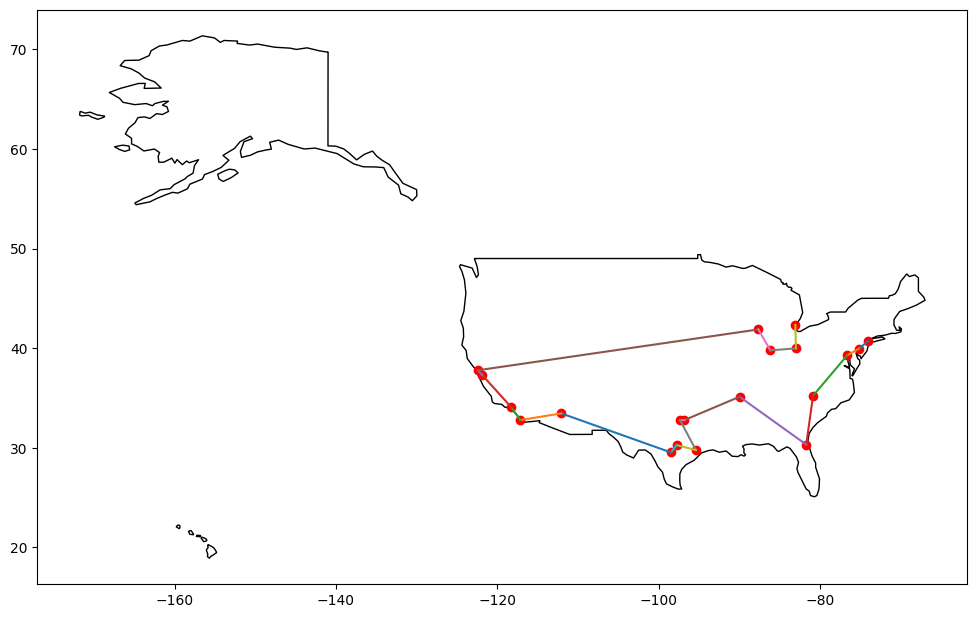

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world[world.name == 'United States of America'].plot(
    color='white', edgecolor='black', figsize=(12, 10))

gdf.plot(ax=ax,color='red')

for i in range(0, len(state)-1):
  plt.plot( [-df[df.City==state[i]].Longitude, -df[df.City==state[i+1]].Longitude], [df[df.City==state[i]].Latitude, df[df.City==state[i+1]].Latitude])

plt.show()

# Exerciții

1. Scrieți o scurtă caracterizare comparativă (4-5 paragrafe) a metodei căutării tabu pe baza articolului ["Tabu Search: A Comparative Study"](https://www.researchgate.net/publication/221787181_Tabu_Search_A_Comparative_Study). Care este diferența esențială față de celelalte metode discutate în articol (consultați Tabelul 3.1)?
2. Implementați și obțineți soluția cu [`dwave-tabu`](https://docs.ocean.dwavesys.com/projects/tabu/en/latest/) pentru un exemplu de model QUBO descris în ["A Tutorial on Formulating and Using QUBO Models"](https://arxiv.org/pdf/1811.11538.pdf) (diferit de cele prezentate în laborator).
3. Conform articolului ["On the Convergence Time of Simulated Annealing"](https://core.ac.uk/download/pdf/76359167.pdf) ce se poate afirma despre convergența metodei SA?
4. Care [programe de răcire](https://www.researchgate.net/publication/282449315_A_Comparative_Study_of_Simulated_Annealing_with_different_Cooling_Schedules_for_Geometric_Optimization_of_a_Heat_Transfer_Problem_According_to_Constructal_Design) (cooling schedule) sunt cel mai des folosite? La ce tipuri de probleme se pretează programele de răcire mai lente?
5. Conform [acestei](https://page.mi.fu-berlin.de/prechelt/Biblio/kangaroo_analogy.html) analogii amuzante, cum este descrisă dinamica călirii simulate? 
6. Cu ajutorul [`scipy.optimize.dual_annealing`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html) găsiți optimele funcțiilor studiate laboratorul precedent (conform exemplului din documentație - schimbați definiția funcției `func`). 
```python
import numpy as np
from scipy.optimize import dual_annealing
# 10-D problem, with many local minima (multimodal). 
# The bellow defined function is called Rastrigin (https://en.wikipedia.org/wiki/Rastrigin_function)
func = lambda x: np.sum(x*x - 10*np.cos(2*np.pi*x)) + 10*np.size(x)
lw = [-5.12] * 10
up = [5.12] * 10
res = dual_annealing(func, bounds=list(zip(lw, up)))
print('Solution: ', res.x)
print('Value: ', res.fun)
```
a) Cum se compară performanța cu strategiile de îmbunătățire iterativă, în cazul funcțiilor multimodale?

  b) Prin ce diferă [`scipy.optimize.dual_annealing`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html) față de algoritmul SA clasic?

7. Rezolvați problema comis voiajorului pentru [municipiile de rang 0 și 1 din România](https://ro.wikipedia.org/wiki/Municipiile_României) cu SA și [TS](https://github.com/polatbilek/Tabu-search-on-Travelling-Salesman-Problem).
8. *Implementați (soluție proprie) metoda căutării tabu sau cea a călirii simulate și exemplificați funcționalitatea pe o problemă aleasă.* **(opțional, punct în plus)**.